# Load, view, and organize data

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

# Step 2: Read the uploaded CSV file and convert it into a DataFrame
# Replace 'your_file.csv' with the actual name of your CSV file
file_name = list(uploaded.keys())[0]  # Extracting the file name
df = pd.read_csv(file_name)

# Step 3: Display the DataFrame
print("Data loaded successfully. Here's the DataFrame:")
df.set_index('Name', inplace=True)


Saving Bridgeport.csv to Bridgeport (1).csv
Data loaded successfully. Here's the DataFrame:


In [ ]:
print(df.tail())
print(df.columns)

             Latitude  Longitude         Year        SL_mm  \
Name                                                         
BRIDGEPORT  41.173333 -73.181667  2021.583333  7112.048986   
BRIDGEPORT  41.173333 -73.181667  2021.666667  7121.903227   
BRIDGEPORT  41.173333 -73.181667  2021.750000  7228.532163   
BRIDGEPORT  41.173333 -73.181667  2021.833333  7105.191910   
BRIDGEPORT  41.173333 -73.181667  2021.916667  7089.279029   

            Inv_Bar_Contribution  Inv_Bar_Effects  
Name                                               
BRIDGEPORT             -7.775168         4.226414  
BRIDGEPORT             21.426118        15.467604  
BRIDGEPORT             30.856443        59.559106  
BRIDGEPORT             -5.785806        29.433425  
BRIDGEPORT              7.859956        16.499182  
Index(['Latitude', 'Longitude', 'Year', 'SL_mm', 'Inv_Bar_Contribution',
       'Inv_Bar_Effects'],
      dtype='object')


# Time series analysis


## plot

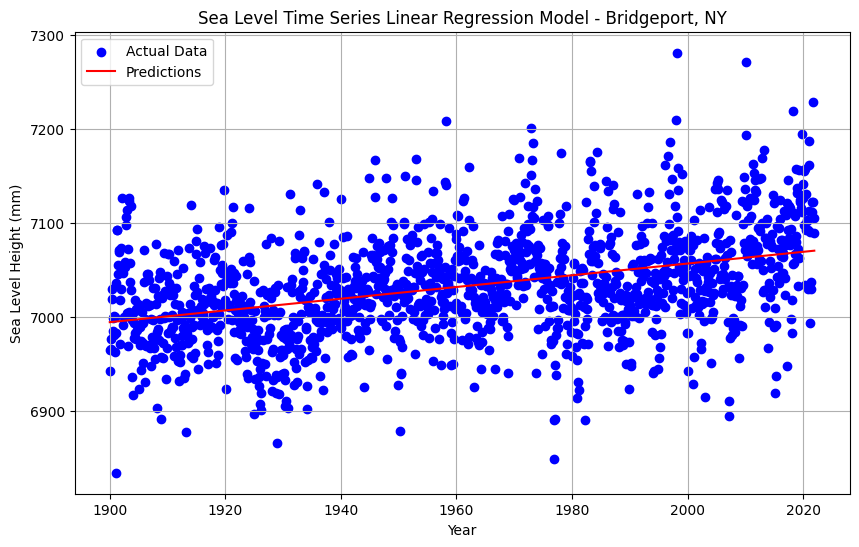

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'SL_mm' is the target variable and 'Year' is the predictor variable
X = df[['Year']]  # Predictor variable (independent variable)
y = df['SL_mm']   # Target variable (dependent variable)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X, y)

# Making predictions
predictions = model.predict(X)

# Plotting the original data and the predictions
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['SL_mm'], color='blue', label='Actual Data')
plt.plot(df['Year'], predictions, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Sea Level Height (mm)')
plt.title('Sea Level Time Series Linear Regression Model - Bridgeport, NY')
plt.legend()
plt.grid(True)
plt.savefig("/content/drive/My Drive/sea_level_prediction_plot.png")  # Change the file extension to your desired format if needed
plt.show()

In [ ]:
future_years = pd.DataFrame({'Year': range(2022, 2031)})  # Prediction range from 2022 to 2030
future_predictions = model.predict(future_years)

# Creating a DataFrame with predictions
predictions_df = pd.DataFrame({'Year': future_years['Year'], 'SL_mm': future_predictions})
print(predictions_df)

file_name = file_name[:-4]

# Save predictions_df as a CSV file with the modified file_name
predictions_df.to_csv(file_name + ".csv", index=False)

csv_file_path = file_name + ".csv"

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Move the CSV file to Google Drive for persistent storage
import shutil
shutil.move(csv_file_path, "/content/drive/My Drive/" + csv_file_path)

   Year        SL_mm
0  2022  7070.438942
1  2023  7071.063334
2  2024  7071.687725
3  2025  7072.312117
4  2026  7072.936508
5  2027  7073.560900
6  2028  7074.185291
7  2029  7074.809683
8  2030  7075.434074
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/My Drive/Bridgeport (1).csv'

## r^2

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate R^2 value
r2 = r2_score(y, predictions)
print("R^2 Score:", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)
print("Mean Squared Error (MSE):", mse)

R^2 Score: 0.15468120681311393
Mean Squared Error (MSE): 2642.6226543765397


# Linear Regression

## r^2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = df[['Year']]  # Predictor variable (independent variable)
y = df['SL_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

# Optionally, you can also print the coefficients of the linear regression model
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Mean Squared Error (MSE): 2858.8493838652544
Coefficient of Determination (R^2): 0.08930131583402412
Intercept: 5758.433030924685
Coefficient: 0.6499765690440648


## plot

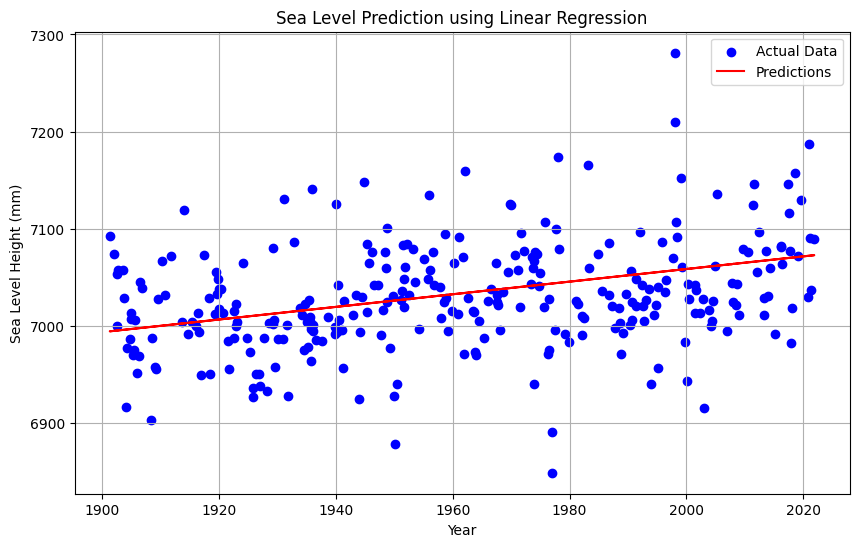

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Sea Level Height (mm)')
plt.title('Sea Level Prediction using Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Neural Network

## r^2

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'SL_mm' is the target variable and 'Year' is the predictor variable
X = df[['Year']].values  # Predictor variable (independent variable)
y = df['SL_mm'].values   # Target variable (dependent variable)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error (MSE):", mse)

# Make predictions
predictions = model.predict(X_test_scaled)

# Calculate R^2 value
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)


Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 49458220.0000
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 49435000.0000
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 49378752.0000
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 49262924.0000
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 49054740.0000
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 48723188.0000
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 48237796.0000
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 47572088.0000
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 46703384.0000
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 45612644.0000
Epoch 11/100
37/37 [==============================] - 0s 2ms/step - loss: 44290676.0000
Epoch 12/100
37/37 [=====================

## plot

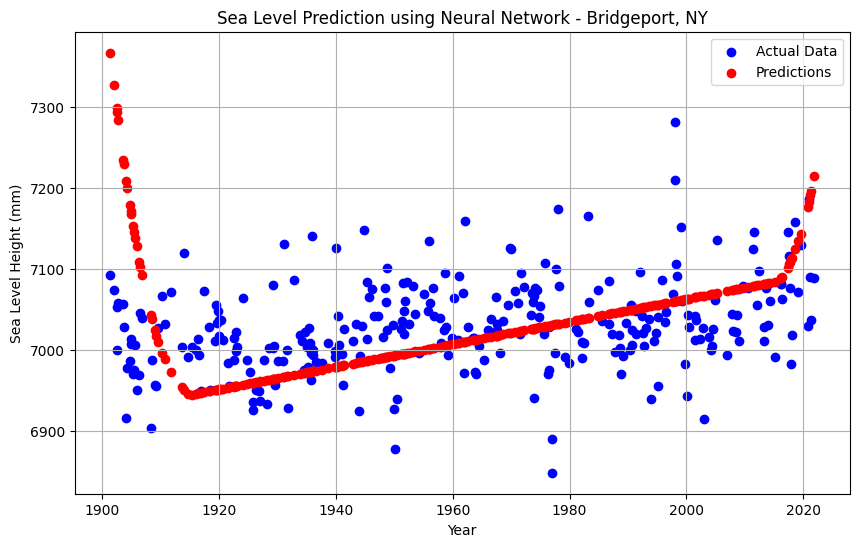

In [ ]:
import matplotlib.pyplot as plt

# Plotting the original data and the predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, predictions, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Sea Level Height (mm)')
plt.title('Sea Level Prediction using Neural Network - Bridgeport, NY')
plt.legend()
plt.grid(True)

plt.savefig("/content/drive/My Drive/NeuralNetwork.png")  # Change the file extension to your desired format if needed
plt.show()

# Decision tree

Training Set - R^2: 1.0
Training Set - Mean Squared Error (MSE): 0.0
Testing Set - R^2: -0.09306834878616832
Testing Set - Mean Squared Error (MSE): 3431.341045926479


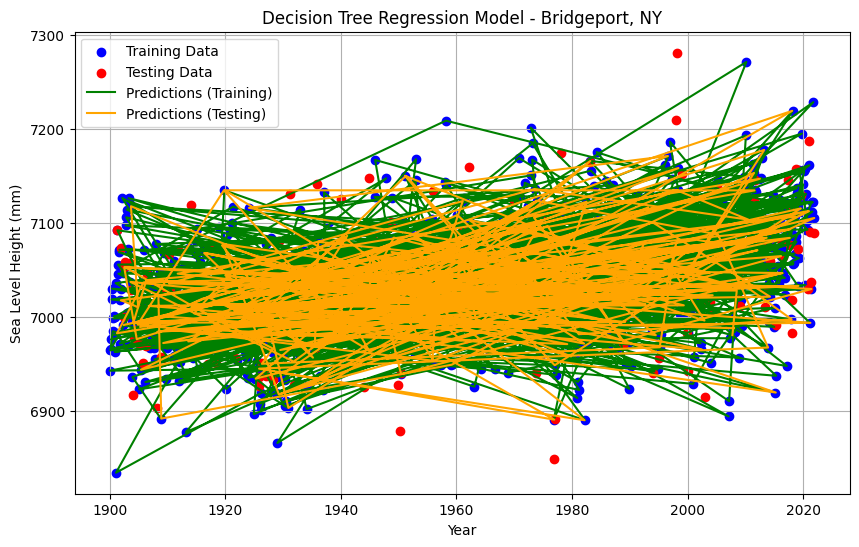

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'Year' is the predictor variable and 'SL_mm' is the target variable
X = df[['Year']]  # Predictor variable (independent variable)
y = df['SL_mm']   # Target variable (dependent variable)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Calculate R^2 and MSE for training data
r2_train = r2_score(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
print("Training Set - R^2:", r2_train)
print("Training Set - Mean Squared Error (MSE):", mse_train)

# Calculate R^2 and MSE for testing data
r2_test = r2_score(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
print("Testing Set - R^2:", r2_test)
print("Testing Set - Mean Squared Error (MSE):", mse_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_train, predictions_train, color='green', label='Predictions (Training)')
plt.plot(X_test, predictions_test, color='orange', label='Predictions (Testing)')
plt.xlabel('Year')
plt.ylabel('Sea Level Height (mm)')
plt.title('Decision Tree Regression Model - Bridgeport, NY')
plt.legend()
plt.grid(True)
plt.savefig("/content/drive/My Drive/DecisionTree.png")  # Change the file extension to your desired format if needed
plt.show()

# Random forest

Training Set - R^2: 0.884516855294221
Training Set - Mean Squared Error (MSE): 360.3698833987884
Testing Set - R^2: 0.19203601572361684
Testing Set - Mean Squared Error (MSE): 2536.3464105026437


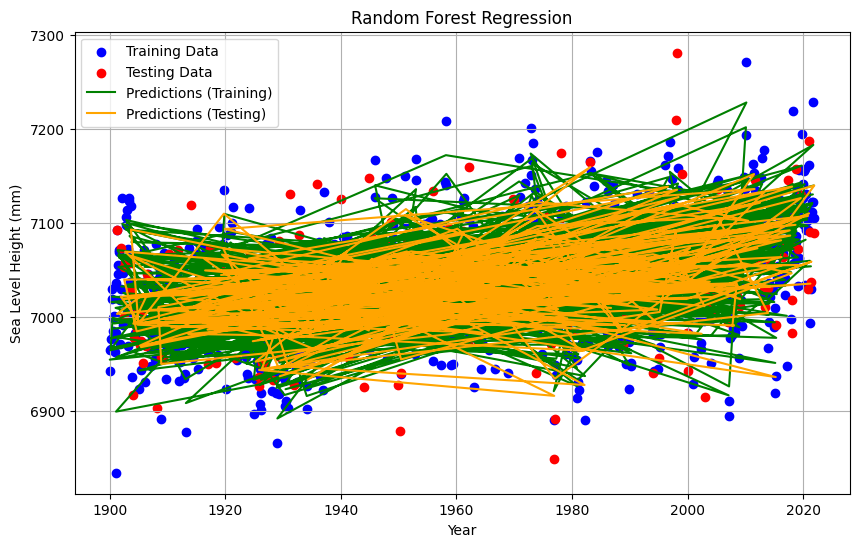

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'Year' is the predictor variable and 'SL_mm' is the target variable
X = df[['Year']]  # Predictor variable (independent variable)
y = df['SL_mm']   # Target variable (dependent variable)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the random forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Calculate R^2 and MSE for training data
r2_train = r2_score(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
print("Training Set - R^2:", r2_train)
print("Training Set - Mean Squared Error (MSE):", mse_train)

# Calculate R^2 and MSE for testing data
r2_test = r2_score(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
print("Testing Set - R^2:", r2_test)
print("Testing Set - Mean Squared Error (MSE):", mse_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_train, predictions_train, color='green', label='Predictions (Training)')
plt.plot(X_test, predictions_test, color='orange', label='Predictions (Testing)')
plt.xlabel('Year')
plt.ylabel('Sea Level Height (mm)')
plt.title('Random Forest Regression')
plt.legend()
plt.grid(True)
plt.show()
